# Weight dynamics comparison
This is notebook to compare the weight dynamics of an ever changining connectivity matrix vs a connectivity matrix that is only changing when k > 0

In [1]:
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 12)

np.set_printoptions(suppress=True, precision=2)

sns.set(font_scale=3.5)

from network import Protocol, NetworkManager, BCPNNPerfect
from plotting_functions import plot_weight_matrix, plot_state_variables_vs_time, plot_winning_pattern
from plotting_functions import plot_network_activity, plot_network_activity_angle
from analysis_functions import calculate_recall_time_quantities, calculate_angle_from_history
from connectivity_functions import artificial_connectivity_matrix

# Weight evolution

In [2]:
from_pattern = 2
to_pattern = 3

def get_weights(manager, from_pattern, to_pattern):

    w_self = manager.nn.w_ampa[from_pattern, from_pattern]
    w_next = manager.nn.w_ampa[to_pattern, from_pattern]
    w_rest = np.mean(nn.w_ampa[(to_pattern + 1):, from_pattern])

    return w_self, w_next, w_rest 

epochs 0
epochs 1


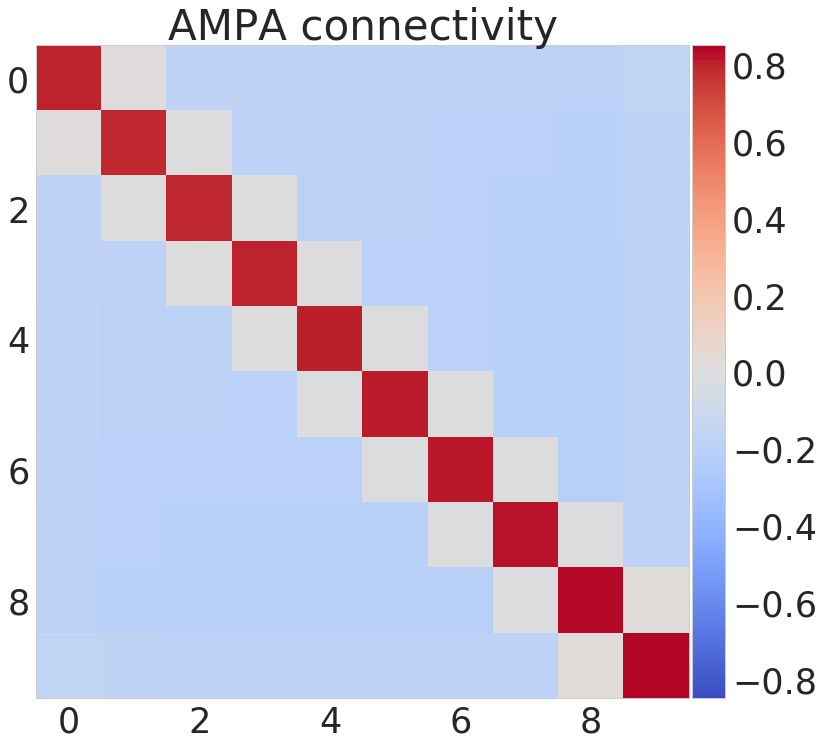

In [3]:
always_learning = False
k_perfect = True

# First we run the training protocol
g_w_ampa = 2.0
g_w = 0.0
g_a = 10.0
tau_a = 0.250
G = 1.0
sigma = 0.0
tau_z_pre_ampa = 0.020
tau_p = 10.0

# Patterns parameters
hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o', 's', 'z_pre_ampa', 'w_ampa']

# Protocol
training_time = 0.100
inter_sequence_interval = 0.5
inter_pulse_interval = 0.0
epochs = 2

# Build the network
nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, sigma=sigma, G=G,
                  tau_z_pre_ampa=tau_z_pre_ampa, tau_z_post_ampa=tau_z_pre_ampa, tau_p=tau_p, z_transfer=False,
                  diagonal_zero=False, strict_maximum=False, perfect=True, k_perfect=k_perfect,
                  always_learning=always_learning)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Build the protocol for training
protocol = Protocol()
patterns_indexes = [i for i in range(n_patterns)]
protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                         inter_sequence_interval=inter_sequence_interval, epochs=epochs)

# Train
epoch_history = manager.run_network_protocol(protocol=protocol, verbose=True)

z_training = manager.history['z_pre_ampa']
o_training = manager.history['o']
w_training = manager.history['w_ampa'][:, to_pattern, from_pattern]
time_training = np.linspace(0, manager.T_total, num=o_training.shape[0])

plot_weight_matrix(manager.nn, ampa=True)

epochs 0
epochs 1


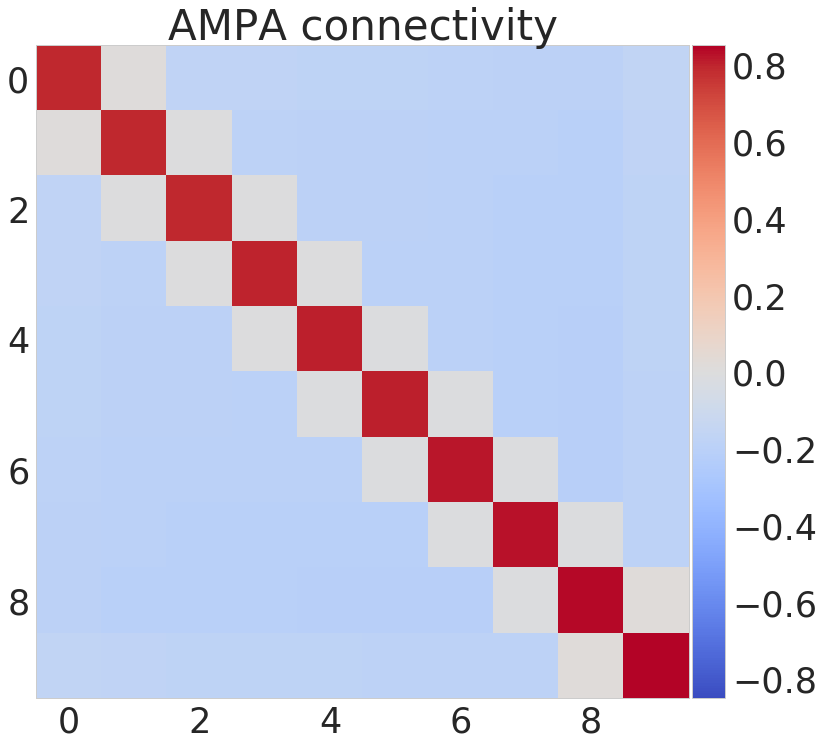

In [4]:
always_learning = True
k_perfect = True

# First we run the training protocol
g_w_ampa = 2.0
g_w = 0.0
g_a = 10.0
tau_a = 0.250
G = 1.0
sigma = 0.0
tau_z_pre_ampa = 0.020
tau_p = 10.0

# Patterns parameters
hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o', 's', 'z_pre_ampa', 'w_ampa']

# Protocol
training_time = 0.100
inter_sequence_interval = 0.5
inter_pulse_interval = 0.0
epochs = 2

# Build the network
nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, sigma=sigma, G=G,
                  tau_z_pre_ampa=tau_z_pre_ampa, tau_z_post_ampa=tau_z_pre_ampa, tau_p=tau_p, z_transfer=False,
                  diagonal_zero=False, strict_maximum=False, perfect=True, k_perfect=k_perfect,
                  always_learning=always_learning)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Build the protocol for training
protocol = Protocol()
patterns_indexes = [i for i in range(n_patterns)]
protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                         inter_sequence_interval=inter_sequence_interval, epochs=epochs, 
                         resting_time=inter_sequence_interval)

# Train
epoch_history = manager.run_network_protocol(protocol=protocol, verbose=True)

z_training = manager.history['z_pre_ampa']
o_training = manager.history['o']
w_training_always = manager.history['w_ampa'][:, to_pattern, from_pattern]
time_training = np.linspace(0, manager.T_total, num=o_training.shape[0])

plot_weight_matrix(manager.nn, ampa=True)

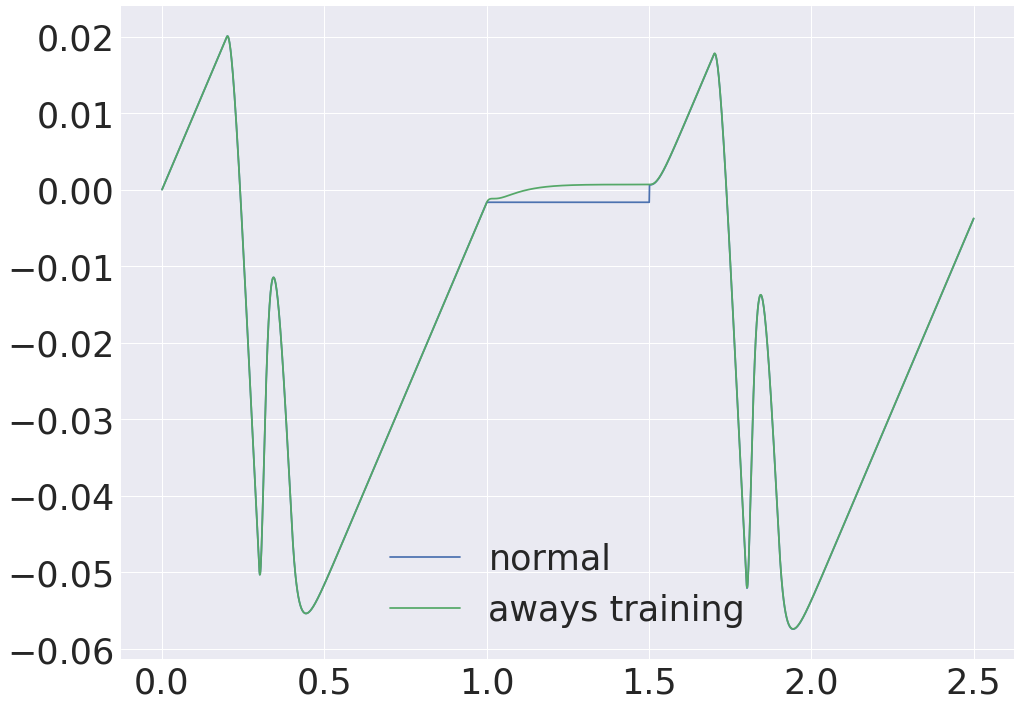

In [5]:
time = np.linspace(0, manager.T_total, num=o_training.shape[0])
plt.plot(time, w_training, label='normal')
plt.plot(time, w_training_always, label='aways training')
plt.legend();

At a first approximation it does not lok that different. 


## Weight comparison

In [11]:
sns.set(font_scale=3.5)
sns.set_style(style='white')
markersize = 32
linewidth = 10

In [9]:
always_learning = False
k_perfect = True

g_w_ampa = 2.0
g_w = 0.0
g_a = 10.0
tau_a = 0.250
G = 1.0
sigma = 0.0


# Patterns parameters
hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o', 's']

# Protocol
training_time = 0.100
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
epochs = 3

In [8]:
training_times_vector = np.arange(0.050, 3.050, 0.150)
w_self_vector_tt_a = np.zeros_like(training_times_vector)
w_next_vector_tt_a = np.zeros_like(training_times_vector)
w_rest_vector_tt_a = np.zeros_like(training_times_vector)

for index, training_time_ in enumerate(training_times_vector):

    # Build the network
    nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a,
                      sigma=sigma, G=G,
                      z_transfer=False, diagonal_zero=False, strict_maximum=True, perfect=True)

    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

    # Build the protocol for training
    protocol = Protocol()
    patterns_indexes = [i for i in range(n_patterns)]
    protocol.simple_protocol(patterns_indexes, training_time=training_time_, inter_pulse_interval=inter_pulse_interval,
                             inter_sequence_interval=inter_sequence_interval, epochs=epochs)

    # Train
    epoch_history = manager.run_network_protocol(protocol=protocol, verbose=False)

    w_self, w_next, w_rest = get_weights(manager, from_pattern, to_pattern)

    w_self_vector_tt_a[index] = w_self
    w_next_vector_tt_a[index] = w_next
    w_rest_vector_tt_a[index] = w_rest


In [9]:
always_learning = False

training_times_vector = np.arange(0.050, 3.050, 0.150)
w_self_vector_tt = np.zeros_like(training_times_vector)
w_next_vector_tt = np.zeros_like(training_times_vector)
w_rest_vector_tt = np.zeros_like(training_times_vector)

for index, training_time_ in enumerate(training_times_vector):

    # Build the network
    nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, sigma=sigma, G=G,
                      tau_z_pre_ampa=tau_z_pre_ampa, tau_z_post_ampa=tau_z_pre_ampa, tau_p=tau_p, z_transfer=False,
                      diagonal_zero=False, strict_maximum=False, perfect=True, k_perfect=k_perfect,
                      always_learning=always_learning)

    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

    # Build the protocol for training
    protocol = Protocol()
    patterns_indexes = [i for i in range(n_patterns)]
    protocol.simple_protocol(patterns_indexes, training_time=training_time_, inter_pulse_interval=inter_pulse_interval,
                             inter_sequence_interval=inter_sequence_interval, epochs=epochs)

    # Train
    epoch_history = manager.run_network_protocol(protocol=protocol, verbose=False)

    w_self, w_next, w_rest = get_weights(manager, from_pattern, to_pattern)

    w_self_vector_tt[index] = w_self
    w_next_vector_tt[index] = w_next
    w_rest_vector_tt[index] = w_rest

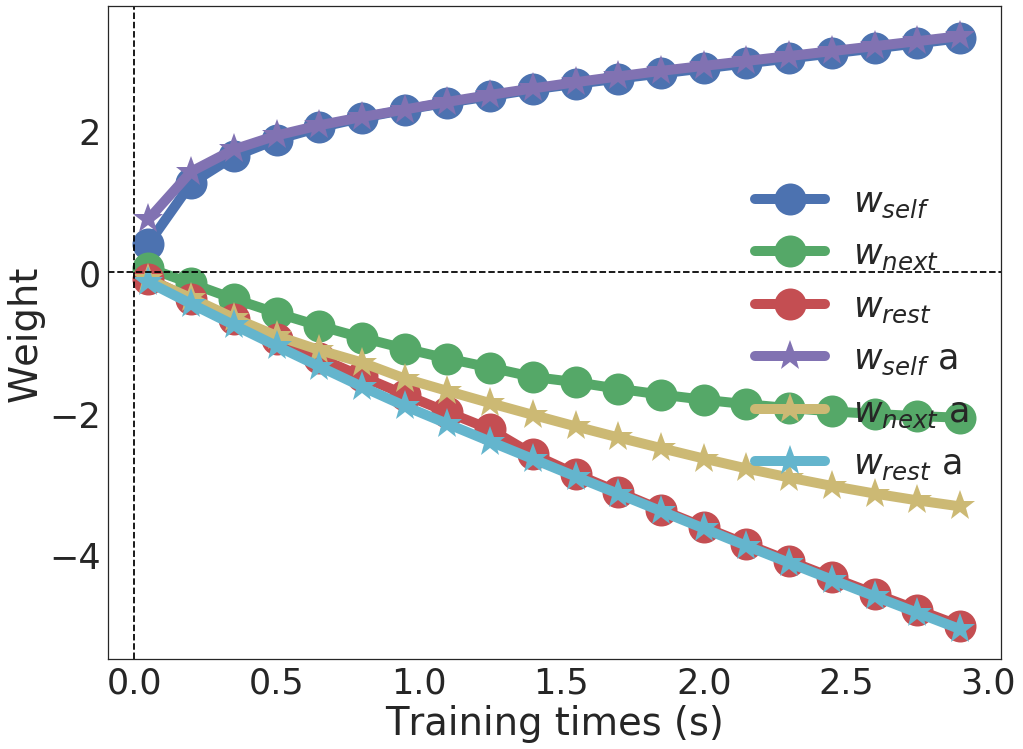

In [12]:
fig1 = plt.figure(figsize=(16, 12))
ax1 = fig1.add_subplot(111)
ax1.plot(training_times_vector, w_self_vector_tt, 'o-', lw=linewidth, markersize=markersize, label=r'$w_{self}$')
ax1.plot(training_times_vector, w_next_vector_tt, 'o-', lw=linewidth, markersize=markersize, label=r'$w_{next}$')
ax1.plot(training_times_vector, w_rest_vector_tt, 'o-', lw=linewidth, markersize=markersize, label=r'$w_{rest}$')

ax1.plot(training_times_vector, w_self_vector_tt_a, '*-', lw=linewidth, markersize=markersize, label=r'$w_{self}$ a')
ax1.plot(training_times_vector, w_next_vector_tt_a, '*-', lw=linewidth, markersize=markersize, label=r'$w_{next}$ a')
ax1.plot(training_times_vector, w_rest_vector_tt_a, '*-', lw=linewidth, markersize=markersize, label=r'$w_{rest}$ a')

ax1.set_xlabel('Training times (s)')
ax1.set_ylabel('Weight')

ax1.axhline(0, ls='--', color='black')
ax1.axvline(0, ls='--', color='black')

ax1.legend();

I do not really understand why this hapens? the difference between w_next here and without always learning. 

The difference has to be what happens to p_ij and p_i and p_j during learning. They probably activate separately and makes the p_ij co-activation less meaningful. Another, avenue, maybe more complicated is that the creating of w_next feedbacks on to them and they feedback_into it. 